In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from glob import glob
import pickle5 as pickle
import seaborn as sns
from collections import Counter
import math
import textwrap

In [3]:
def glob_dict_concatenator(wildcard_filepath):
    f_path_list = sorted(glob(f"{wildcard_filepath}"))
    full_dict = {}
    for f_path in f_path_list:
        with open(f_path, 'rb') as handle:
                temp_dict = pickle.load(handle)
        for key_0 in temp_dict.keys():
            if key_0 not in full_dict.keys():
                full_dict.update({key_0:{}})
            for key_1 in temp_dict[key_0].keys():
                full_dict[key_0].update({key_1:temp_dict[key_0][key_1]})
    return full_dict


def format_dataframes(a1_df, ar_str, special_col, other = 'Other', windows = [20,40]):
    a1_new_df = pd.DataFrame(columns = a1_df.columns)
    k = 0
    for col in a1_new_df.columns:
        a1_new_df.loc[f'{ar_str}{k}', col] = float(
            a1_df.loc[[i for i in a1_df.index if i[1] == f'{k}'], col])
    for k in range(1,4):
        for w in windows:
            for col in a1_new_df.columns:
                if str(w) in col or col == special_col:
                    temp = a1_df.loc[[i for i in a1_df.index if i[1] == f'{k}' or (
                            ar_str in i and i[len(ar_str)+1] == f'{k}' and str(w) in i)], col]
                    a1_new_df.loc[f'{ar_str}{k} w{w}', col] = float(temp.sum())
    k = other
    a1_new_df.loc[f'{k}'] = a1_df.loc[k]
    return a1_new_df.fillna(0)

def plot_bar_grouped_2(df_list, suptitle, savefig = None, name = None, color_list = True):
    fig, (axes) = plt.subplots(2,2, figsize = (14, 6), constrained_layout = True, dpi = 200)
    for DF_N in range(4):
        ax = axes[DF_N//2, math.floor(DF_N%2)]
        df = df_list[DF_N]
        FONT = 10
    #N columns, M rows
        N_col = len(df.columns)
        M_row = len(df.index)
        X = []
        for i in range(0,N_col+4):
            X.append([m + i/(N_col) for m in range(M_row)])
        w = 1/(N_col + 1)
        color_list = [sns.color_palette('hls', 6)[0], "darkgrey", "lightgrey"]
        for n in range(N_col):
            ax.bar(x = X[n], height = df.iloc[:,n], width = w, align = 'edge', label = df.columns[n], color = color_list[n])
        ax.set_xticks([m for m in range(M_row)])
        ax.set_xticklabels([textwrap.fill(i, 5) for i in list(df.index)], ha = "left", size = FONT*0.8)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(FONT) 
        max_ = df.max().max()
        ax.grid(alpha = 0.3)
        ax.legend(fontsize = FONT)
        ax.set_title(f"System {suptitle[DF_N]}", size = FONT)
        ax.set_ylabel("Proportion", fontsize = FONT)
        ax.vlines(np.arange(M_row), ymin = 0, ymax = 1.2, lw = 0.7)
        ax.set_ylim(0,1)
    plt.tight_layout()
    if savefig != None and name != None:
        plt.savefig(f"{savefig}/{name}.png", bbox_inches = 'tight',    pad_inches = 0.1)
    plt.show()

In [4]:
with open('../../../../../DataCentre/Aug_Simulations/DATA/sys_a_1/all_model_selections.pickle', 'rb') as handle:
        a1_new_dict = pickle.load(handle)
a2_new_dict = glob_dict_concatenator('../../../../../DataCentre/Aug_Simulations/DATA/sys_a_2/model_selections_*.pickle')
b1_new_dict = glob_dict_concatenator('../../../../../DataCentre/Aug_Simulations/DATA/sys_b_1/model_selections_B1_*.pickle')
b2_new_dict = glob_dict_concatenator('../../../../../DataCentre/Aug_Simulations/DATA/sys_b_2/model_var_N*.pickle')

*****

<ipython-input-3-78028c4fcb5f>:59: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


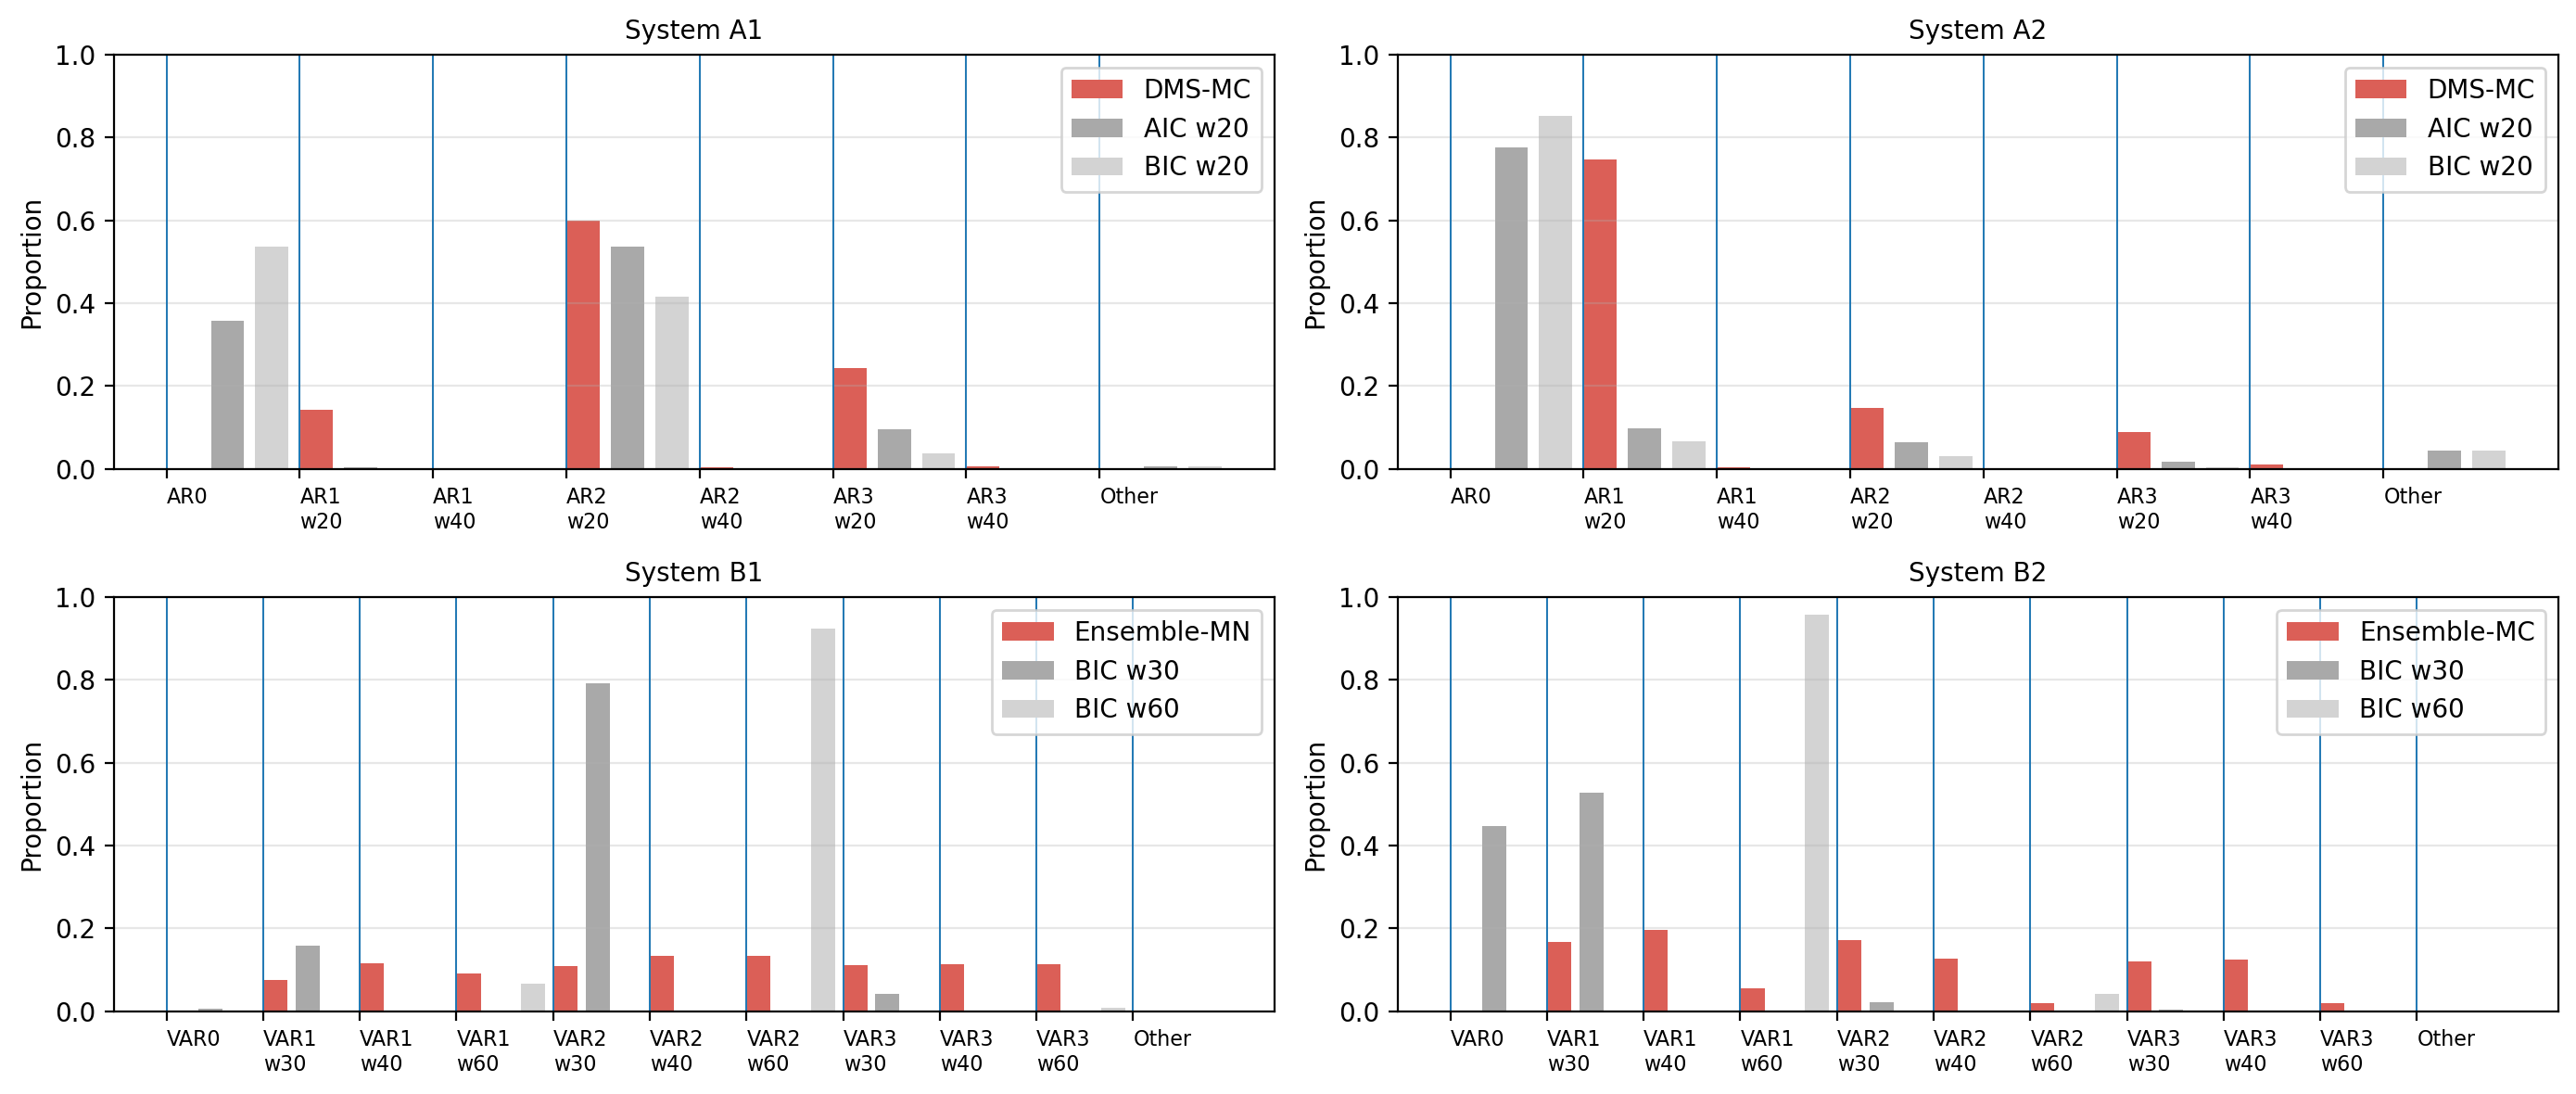

In [7]:
en_mc_dict_a1 = dict(Counter(a1_new_dict['EN MC'].values()))
aic_w20_dict_a1 = dict(Counter(a1_new_dict['AIC w20'].values()))
bic_w20_dict_a1 = dict(Counter(a1_new_dict['BIC w20'].values()))
a1_df = pd.DataFrame({'DMS-MC': en_mc_dict_a1, 'AIC w20': aic_w20_dict_a1, 'BIC w20': bic_w20_dict_a1})

en_mc_dict_a2 = dict(Counter(a2_new_dict['EN MC'].values()))
aic_w20_dict_a2 = dict(Counter(a2_new_dict['AIC w20'].values()))
bic_w20_dict_a2 = dict(Counter(a2_new_dict['BIC w20'].values()))
a2_df = pd.DataFrame({'DMS-MC': en_mc_dict_a2, 'AIC w20': aic_w20_dict_a2, 'BIC w20': bic_w20_dict_a2})

ensemble_mv_df_b1 = pd.DataFrame(b1_new_dict['Ensemble Multi-Valued'].values()).mean()
bic_w30_dict_b1 = dict(Counter(b1_new_dict['BIC VAR w30'].values()))
bic_w60_dict_b1 = dict(Counter(b1_new_dict['BIC VAR w60'].values()))
b1_df = pd.concat([ensemble_mv_df_b1, pd.DataFrame({'BIC w30': bic_w30_dict_b1, 'BIC w60': bic_w60_dict_b1})], axis = 1)
b1_df.columns = ["Ensemble-MN", *b1_df.columns[1:]]

ensemble_mc_df_b2 = pd.DataFrame(b2_new_dict['Ensemble MC'].values()).mean()
bic_w30_dict_b2 = dict(Counter(b2_new_dict['BIC VAR w30'].values()))
bic_w60_dict_b2 = dict(Counter(b2_new_dict['BIC VAR w60'].values()))
b2_df = pd.concat([ensemble_mc_df_b2, pd.DataFrame({'BIC w30': bic_w30_dict_b2, 'BIC w60': bic_w60_dict_b2})], axis = 1)
b2_df.columns = ["Ensemble-MC", *b2_df.columns[1:]]

df_list = []
for df in [a1_df, a2_df, b1_df, b2_df]:
    temp_df_1 = df.loc[[i for i in df.index if type(i) != str]]
    temp_df_1.index = [i[0] for i in temp_df_1.index]
    df = pd.concat([temp_df_1, df.loc[[i for i in df.index if type(i) == str]]])
    ar_index_list = [i for i in [i for i in df.index if i[1] in ['0','1', '2', '3']] if len(i) > 3 and i[4] != '0']
    df.loc['Other'] = df.loc[ar_index_list].sum()
    df = df.drop(ar_index_list)
    df = df/df.sum()
    df_list.append(df.fillna(0))
a1_df, a2_df, b1_df, b2_df = df_list


a1_format = format_dataframes(a1_df, ar_str = 'AR', special_col = 'DMS-MC', other = 'Other', windows = [20,40])
a2_format = format_dataframes(a2_df, ar_str = 'AR', special_col = 'DMS-MC', other = 'Other', windows = [20,40])
b1_format = format_dataframes(b1_df, ar_str = 'VAR', special_col = 'Ensemble-MN', other = 'Other', windows = [30,40,60])
b2_format = format_dataframes(b2_df, ar_str = 'VAR', special_col = 'Ensemble-MC', other = 'Other', windows = [30,40,60])


plot_bar_grouped_2([a1_format, a2_format, b1_format, b2_format], 
                 ["A1", "A2", "B1", "B2"], savefig = "/users/ryanlucas/Desktop/",
                name = "fig3")